In [1]:
from qiskit import QuantumCircuit, Aer, transpile, assemble, execute
from qiskit.visualization import plot_histogram
from numpy.random import randint 
import numpy as np
from qiskit_ibm_provider import IBMProvider

In [2]:
#user input
number_of_nodes = 4
edge_connections =  [[0,1],[0,2],[1,2],[2,3],[1,3]]
number_of_iteration = 1

In [3]:

node_qubit_1D = [i for i in range(number_of_nodes*2)]
node_qubits_2D = [node_qubit_1D[i:i+2] for i in range(0, len(node_qubit_1D), 2)]


number_of_edge = len(edge_connections)
edge_qubits = [number_of_nodes*2 + i for i in range (number_of_edge)]
a = [number_of_nodes * 2  + len(edge_connections)]
all_qubits = node_qubit_1D + edge_qubits + a




print(number_of_nodes)
print(node_qubit_1D)
print(node_qubits_2D)

print(edge_connections)
print(edge_qubits)
print(number_of_edge)

print(a)

print(all_qubits)



4
[0, 1, 2, 3, 4, 5, 6, 7]
[[0, 1], [2, 3], [4, 5], [6, 7]]
[[0, 1], [0, 2], [1, 2], [2, 3], [1, 3]]
[8, 9, 10, 11, 12]
5
[13]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


In [4]:

# node_qubits_2D = [[0,1], [2,3],[4,5]] # yseful for connection in edge
# node_qubit_1D = [ i for i in range (len(node_qubits_2D) * 2) ] # need to somehow remove no_1D variable
# edge_qubits = [6,7,8]
# a = [9] # ancilla
# all_qubits = node_qubit_1D + edge_qubits + a # all qubit list
# edge_connections = [[0,1],[0,2],[1,2]] 


In [5]:
def initialization(qr): # qr takes 1D list of qubits of nodes [0,1,2,3,4,5]
    qc.h(qr)
    qc.barrier()
    
def color_check(q0, q1, q2, q3, e):
    
    # normal color check
#     qc.x([q0,q1,q2,q3])
#     qc.mct([q0,q1,q2,q3], e)
#     qc.x([q0,q1,q2,q3])
    
    
#     qc.x([q0,q2])
#     qc.mct([q0,q1,q2,q3], e)
#     qc.x([q0,q2])
    
#     qc.x([q1,q3])
#     qc.mct([q0,q1,q2,q3], e)
#     qc.x([q1,q3])
    
#     qc.mct([q0,q1,q2,q3], e)
    
#     qc.barrier()

    
    #optimised color check
    
    qc.mct([q0,q1], e)

    qc.x(q2)
    qc.mct([q1,q2], e)
    qc.x(q2)
    
    qc.x([q2,q3])
    qc.mct([q2,q3], e)
    qc.x([q2,q3])

    qc.x(q3)
    qc.mct([q0,q3], e)
    qc.x(q3)
    
    qc.barrier()
    
    
def color_check_inverse(q0, q1, q2, q3, e):
    
    #normal color check
    
#     qc.mct([q0,q1,q2,q3], e)
        
#     qc.x([q1,q3])
#     qc.mct([q0,q1,q2,q3], e)
#     qc.x([q1,q3])
            
#     qc.x([q0,q2])
#     qc.mct([q0,q1,q2,q3], e)
#     qc.x([q0,q2])
            
        
#     qc.x([q0,q1,q2,q3])
#     qc.mct([q0,q1,q2,q3], e)
#     qc.x([q0,q1,q2,q3])
    
    
#     qc.barrier()

    #optimised color check

    qc.x(q3)
    qc.mct([q0,q3], e)
    qc.x(q3)
        
    qc.x([q2,q3])
    qc.mct([q2,q3], e)
    qc.x([q2,q3])
            
    qc.x(q2)
    qc.mct([q1,q2], e)
    qc.x(q2)
        
    qc.mct([q0,q1], e)
    
    
    qc.barrier()

    
def nodes_qubits(e): # is the edge connections element 
    '''takes 1 edge connection 1D list and return the qubit accociated with it 1D list
    '''
    return node_qubits_2D[e[0]] + node_qubits_2D[e[1]]
 

def oracle (edge_connections, a): #edge_connections = [[0,1],[0,2],[1,2]]
    '''Parameter :
        edge_connection 2D list of our edge connected with nodes
        a is 1D list of ancillay/ result qubit
    '''
    # initialising the edge qubit 
    qc.x(edge_qubits)
    qc.barrier()
    
    
    #color check function
    for edge_index, e in enumerate(edge_connections):
        qubits = nodes_qubits(e)
        q1, q2, q3, q4 = qubits[0], qubits[1], qubits[2], qubits[3]
        color_check(q1,q2,q3,q4, edge_index+number_of_nodes*2) # the constant 6 could be replaced with len(nodes*2 or len(nu of qubits for nodes
        
        
    #phase kickback
    qc.mct(edge_qubits , a[0]) # a index to 0 which is the only one 
    qc.barrier()
    
    
    #inverse effect
        
        # normal solution 
#     for edge_index, e in enumerate(edge_connections):
#         qubits = nodes_qubits(e)
#         q1, q2, q3, q4 = qubits[0], qubits[1], qubits[2], qubits[3]
#         color_check_inverse(q1,q2,q3,q4, edge_index+number_of_nodes*2)
        
        #mirror
    
    for  edge_index, e in enumerate(edge_connections[::-1]): # start one
            qubits = nodes_qubits(e)
            q1, q2, q3, q4 = qubits[0], qubits[1], qubits[2], qubits[3]
            color_check_inverse(q1,q2,q3,q4, len(edge_connections)-edge_index+number_of_nodes*2-1)
       
    #reinitilize memory 
    qc.x(edge_qubits)
    qc.barrier()
    

#diffucsion operator

    # diffusion at ancilla
    
    
def diffusion_inversion(node_qubit_1D,a):
    initialization(node_qubit_1D)
    qc.x(node_qubit_1D)
    qc.mct(node_qubit_1D, a[0])
    qc.x(node_qubit_1D)
    qc.x(a[0])
    
    initialization(node_qubit_1D)

#diffusion operator

    # diffusion at last node qubit

    
# def diffusion_inversion(node_qubit_1D,a):
#     initialization(node_qubit_1D)
    
#     qc.x(node_qubit_1D)
#     qc.h( node_qubit_1D[-1])
#     qc.mct(node_qubit_1D[:-1], node_qubit_1D[-1])
#     qc.h( node_qubit_1D[-1])
#     qc.x(node_qubit_1D)
    
    
#     initialization(node_qubit_1D)
    

    
    

    

In [6]:
#main program 

In [7]:
no_of_qubits = len(all_qubits)
no_of_bits = len(node_qubit_1D)

#creating a circuit
qc = QuantumCircuit(no_of_qubits, no_of_bits)

#initializing the state)
initialization(node_qubit_1D)


# ancilla in \-> state
qc.x(a[0])
qc.h(a[0])

qc.barrier()


for i in range(number_of_iteration):
    oracle(edge_connections, a)
    diffusion_inversion(node_qubit_1D, a)
    

#ancial in /-> state

qc.x(a[0])
qc.h(a[0])

qc.barrier()





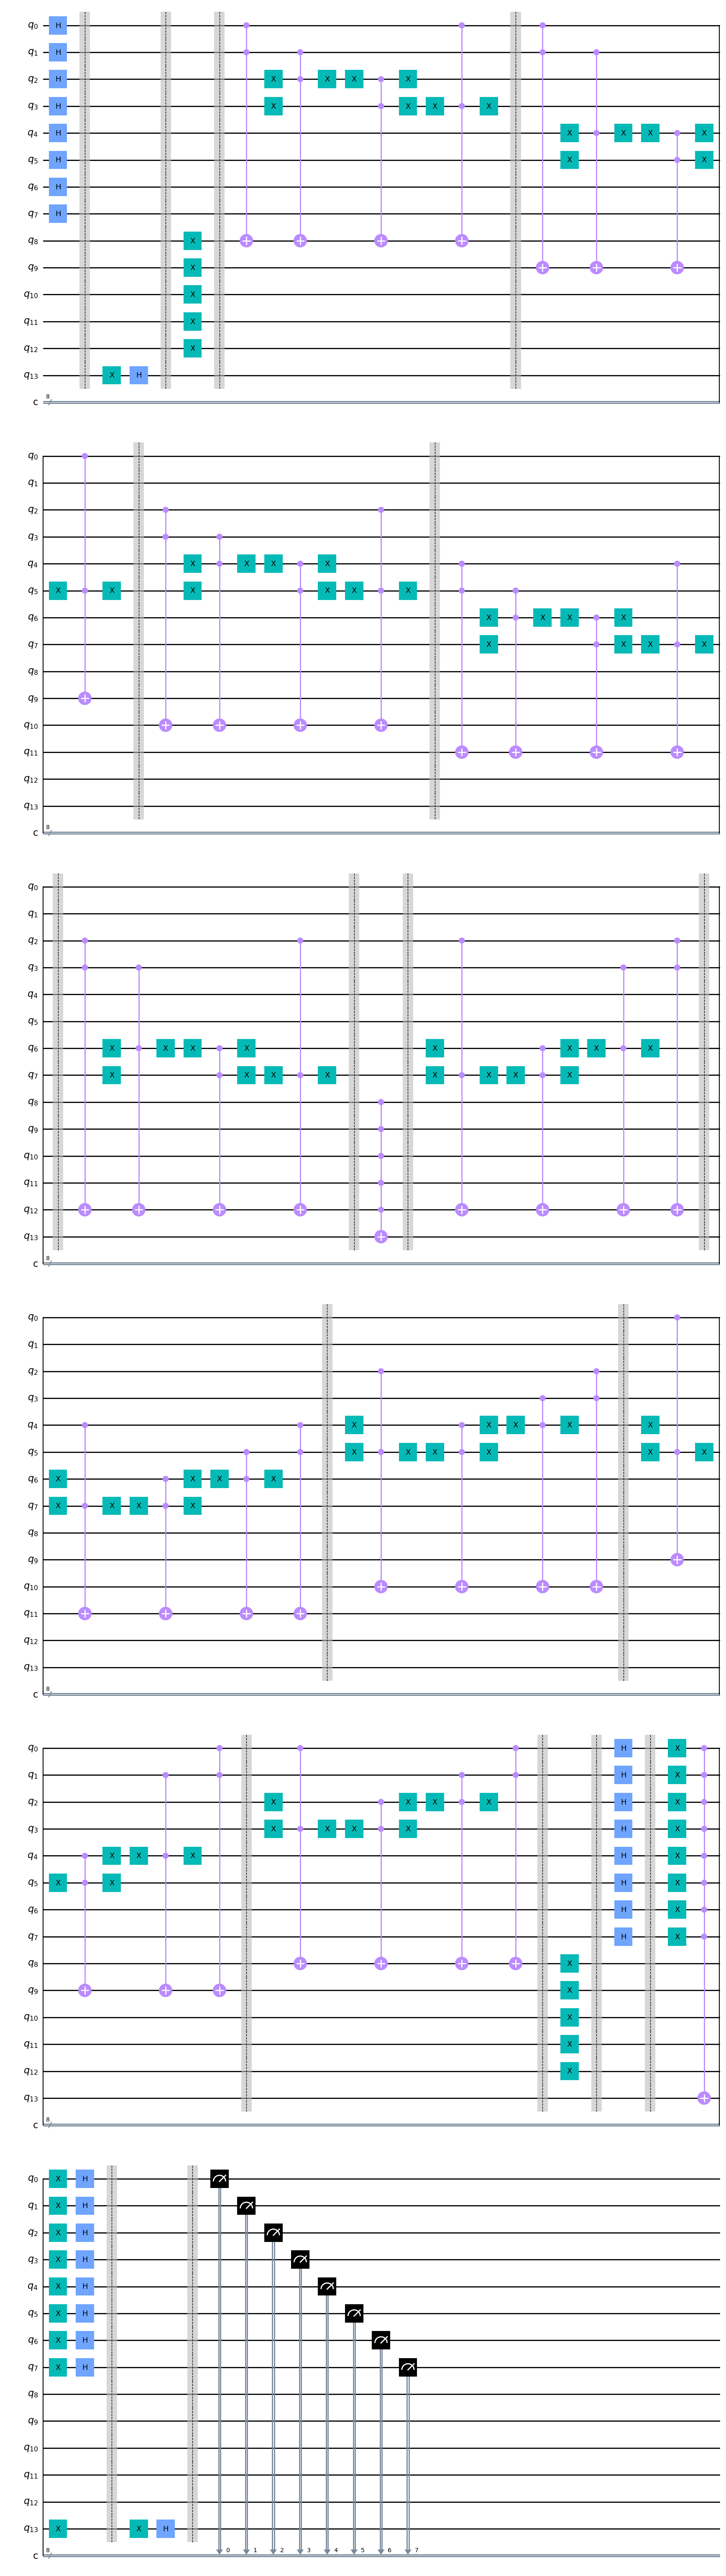

In [8]:
qc.measure(node_qubit_1D,node_qubit_1D)
qc.draw()

In [9]:
# from qiskit_ibm_provider import IBMProvider


# provider = IBMProvider()
# backend = provider.get_backend('ibmq_qasm_simulator')
# job = execute(qc, backend=backend, shots=10000, seed_simulator=12345)
# result = job.result()
# count = result.get_counts()



In [10]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend=backend, shots=10000)
result = job.result()
count = result.get_counts()

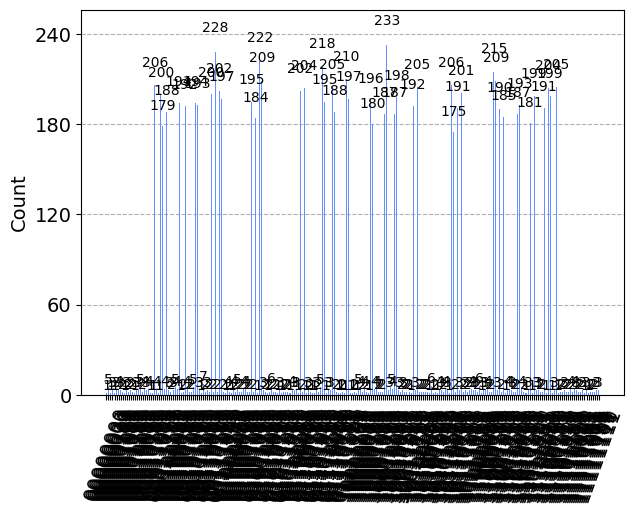

In [11]:
plot_histogram(count)

In [12]:
#sort count
count_sorted = sorted(count.items(), key=lambda x:x[1], reverse=True)

# collect answers with Top 9 probabilities
ans_list = count_sorted[0:9]
low_list = count_sorted[:-1]

low_list

[('10001110', 233),
 ('00110110', 228),
 ('01001101', 222),
 ('01101100', 218),
 ('11000110', 215),
 ('01111000', 210),
 ('11000111', 209),
 ('01001110', 209),
 ('10110001', 206),
 ('00011000', 206),
 ('11100111', 205),
 ('10011110', 205),
 ('01110001', 205),
 ('01100011', 204),
 ('11100011', 204),
 ('01100001', 202),
 ('00111000', 202),
 ('10110110', 201),
 ('00110100', 200),
 ('00011011', 200),
 ('11011011', 199),
 ('11100100', 199),
 ('10010011', 198),
 ('01111001', 197),
 ('00111001', 197),
 ('10000110', 196),
 ('01101101', 195),
 ('01001001', 195),
 ('00100100', 194),
 ('00101100', 194),
 ('11010011', 193),
 ('00101101', 193),
 ('10011100', 192),
 ('00100111', 192),
 ('10110100', 191),
 ('11100001', 191),
 ('11001001', 190),
 ('00011110', 188),
 ('01110010', 188),
 ('11010010', 187),
 ('10010010', 187),
 ('10001101', 187),
 ('11001011', 185),
 ('01001011', 184),
 ('11011000', 181),
 ('10000111', 180),
 ('00011100', 179),
 ('10110010', 175),
 ('00110000', 7),
 ('10111111', 6),
 ('1